Presentation Link: https://drive.google.com/file/d/1HVahIiHGul3nSdYcrNlbq2Gf1nOkAQrm/view?usp=drive_link

#Data Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.utils import resample


In [ ]:
sns.set_style("whitegrid")

In [ ]:
file_path = '/content/Customer Churn.csv'

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [ ]:
categorical_cols = ['Complains', 'Tariff Plan', 'Status', 'Age Group', 'Churn']

In [ ]:
for col in categorical_cols:
  print(col, data[col].unique())

Complains [0 1]
Tariff Plan [1 2]
Status [1 2]
Age Group [3 2 1 4 5]
Churn [0 1]


In [ ]:
data['Tariff Plan'] = data['Tariff Plan'].replace(2, 0)
data['Status'] = data['Status'].replace(2, 0)

In [ ]:
for col in categorical_cols:
  print(col, data[col].unique())

Complains [0 1]
Tariff Plan [1 0]
Status [1 0]
Age Group [3 2 1 4 5]
Churn [0 1]


In [ ]:
fig = px.histogram(data, x='Churn',
                   color='Churn',
                   labels={'Churn':'Churn', 'count':'Count'},
                   title='Distribution of Churn')

fig.update_layout(bargap=0.1,
                  xaxis_title='Churn',
                  yaxis_title='Count',
                  xaxis = dict(
                      tickmode = 'array',
                      tickvals = [0, 1],
                      ticktext = ['No', 'Yes']
                      ),
                  showlegend=False
                 )

fig.show()

In [ ]:
graph_data = data.copy()
graph_data[categorical_cols] = graph_data[categorical_cols].astype(str)

In [ ]:
majority_class = data[data['Churn'] == 0]
minority_class = data[data['Churn'] == 1]

In [ ]:
minority_class_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class))

In [ ]:
balanced_data = pd.concat([majority_class, minority_class_oversampled])

In [ ]:
balanced_data.shape

(5310, 14)

In [ ]:
fig = px.histogram(balanced_data, x='Churn',
                   color='Churn',
                   labels={'Churn':'Churn', 'count':'Count'},
                   title='Distribution of Churn')

fig.update_layout(bargap=0.1,
                  xaxis_title='Churn',
                  yaxis_title='Count',
                  xaxis = dict(
                      tickmode = 'array',
                      tickvals = [0, 1],
                      ticktext = ['No', 'Yes']
                      ),
                  showlegend=False
                 )

fig.show()

In [ ]:
graph_data = balanced_data


In [ ]:
graph_data[categorical_cols] = graph_data[categorical_cols].astype(str)

In [ ]:
bp = px.histogram(graph_data,
            x = 'Churn',
            color = 'Complains',
            text_auto='.2s'
          )

bp.update_layout(
    title={
        'text': "Complains Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size = 36,
    font_size=18,
)

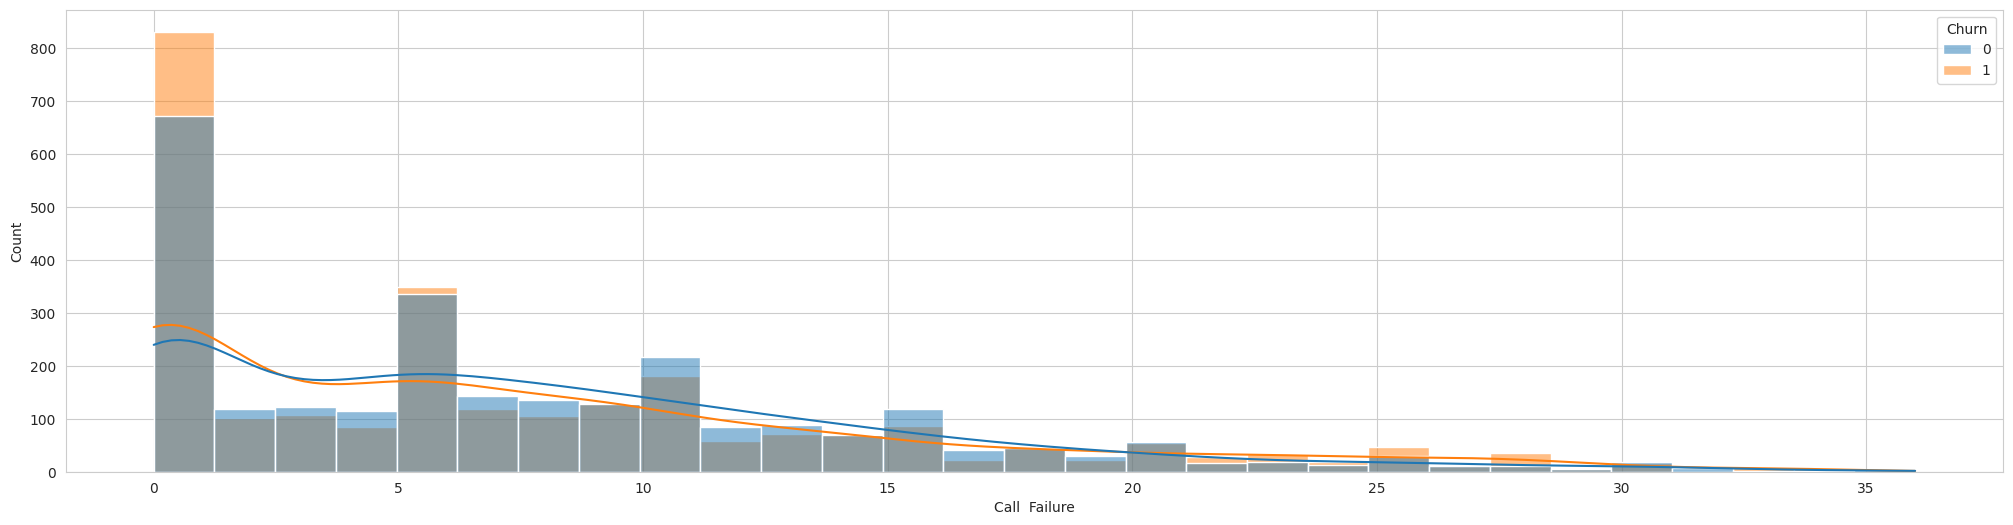

In [ ]:
plt.figure(figsize=(25, 6))
lp = sns.histplot(x = graph_data['Call  Failure'], hue = graph_data['Churn'], kde=True)


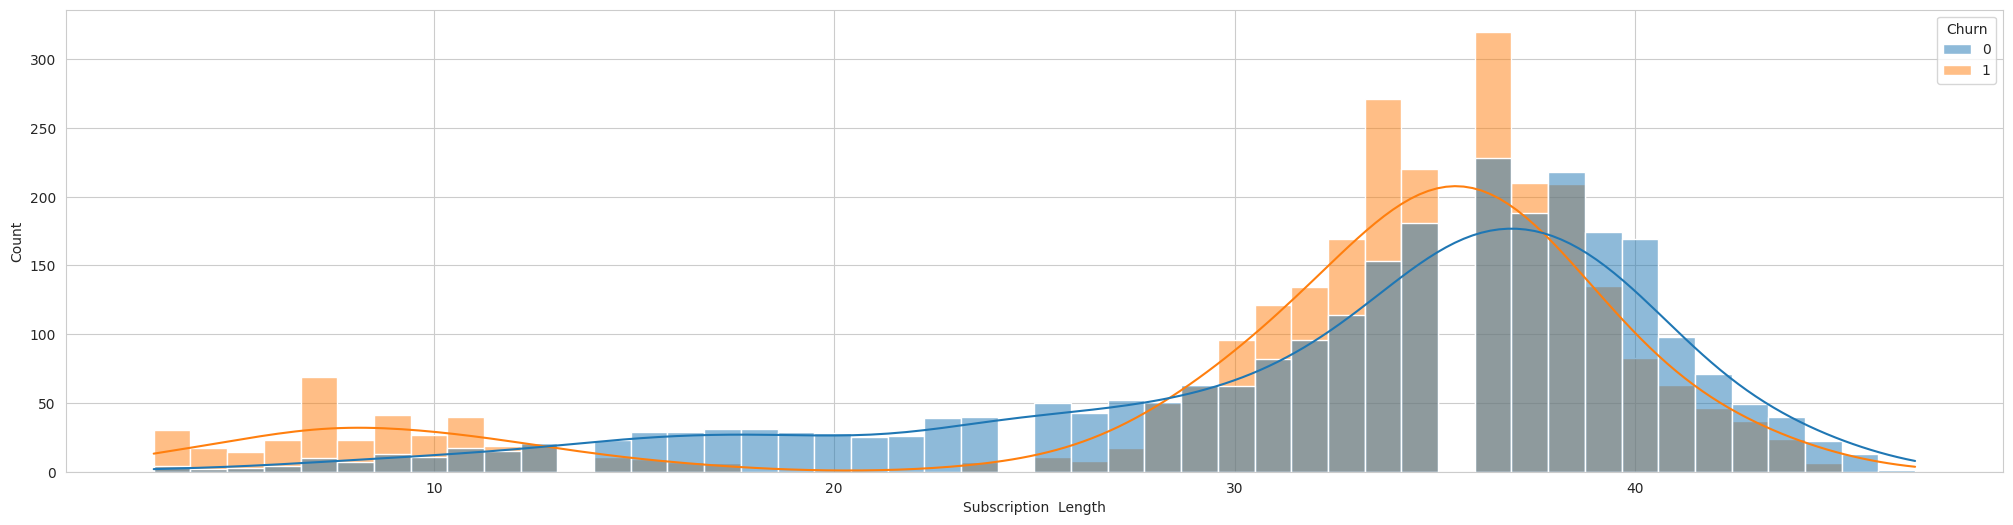

In [ ]:
plt.figure(figsize=(25, 6))
lp = sns.histplot(x = graph_data['Subscription  Length'], hue = graph_data['Churn'], kde=True)

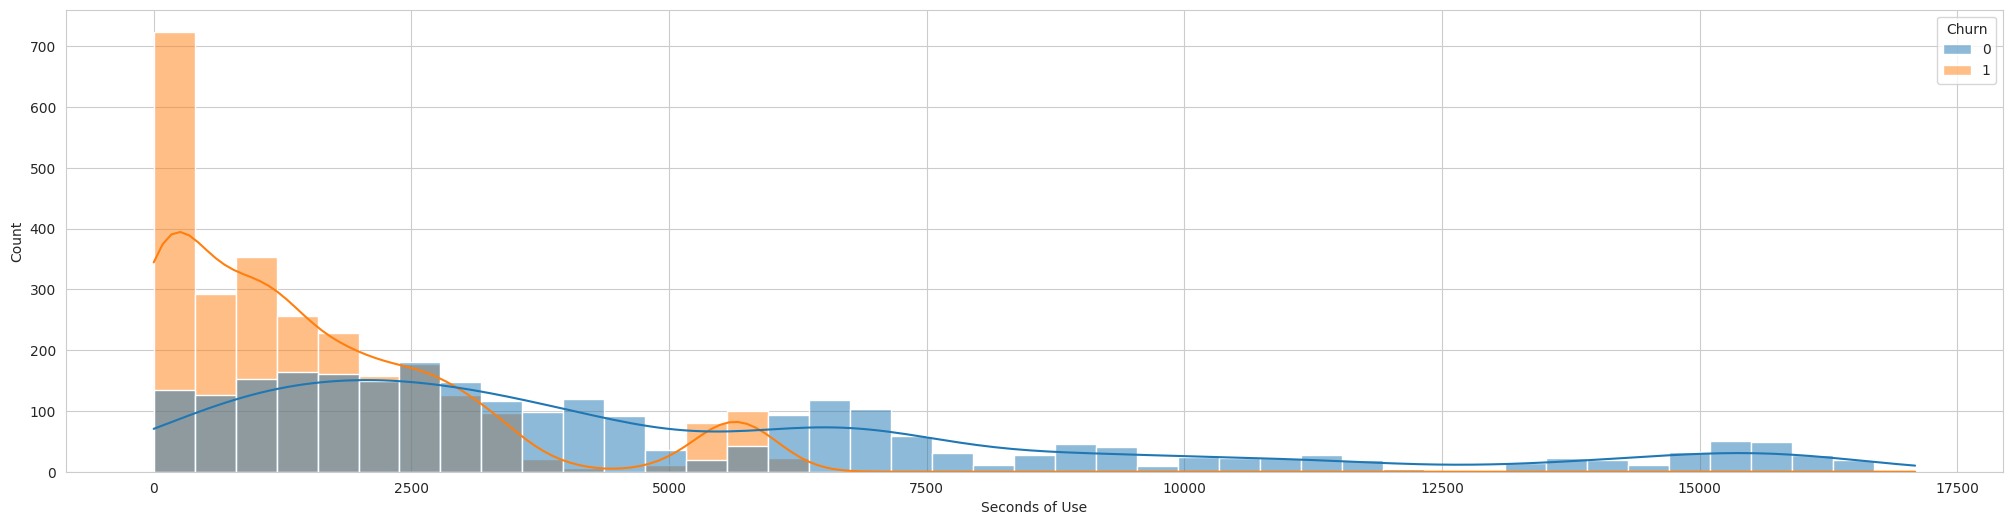

In [ ]:
plt.figure(figsize=(25, 6))
lp = sns.histplot(x = graph_data['Seconds of Use'], hue = graph_data['Churn'], kde=True)

In [ ]:
bp = px.histogram(graph_data,
            x = 'Age Group',
            color = 'Churn',
            text_auto='.2s'
          )

bp.update_layout(
    title={
        'text': "Complains Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size = 36,
    font_size=18,
)

<Axes: >

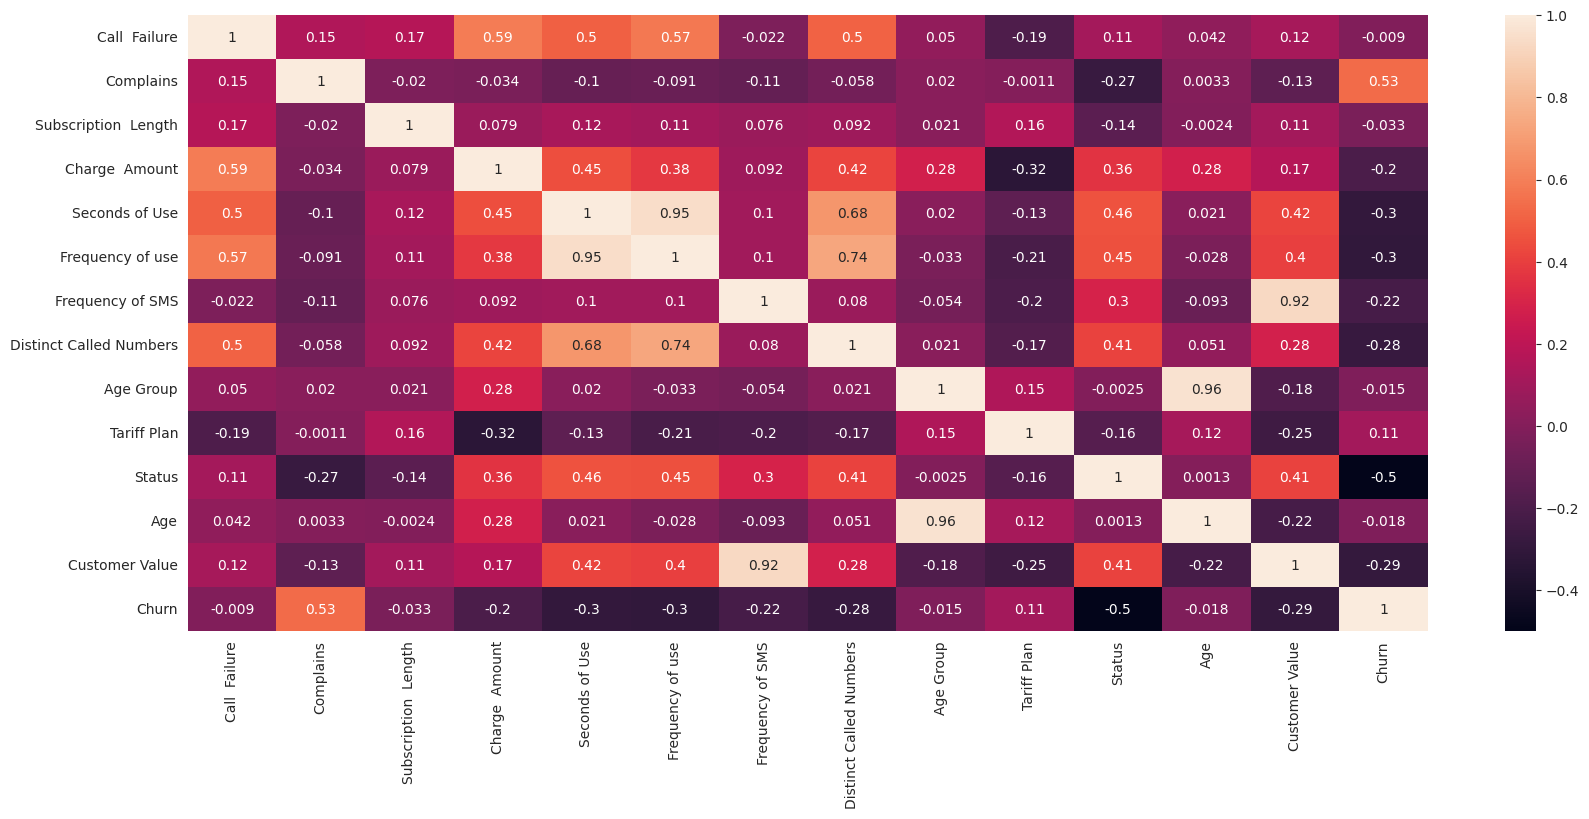

In [ ]:
 plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
X = balanced_data.drop(columns='Churn')
y = balanced_data['Churn']

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
Q1 = X_scaled.quantile(0.25)
Q3 = X_scaled.quantile(0.75)
IQR = Q3 - Q1                 #interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
X_scaled = X_scaled.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X_scaled)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning:

divide by zero encountered in double_scalars



,variables,VIF
0,Call Failure,2.003491
1,Complains,0.061921
2,Subscription Length,1.240540
3,Charge Amount,2.115817
4,Seconds of Use,13.233327
5,Frequency of use,14.046704
6,Frequency of SMS,5.822287
7,Distinct Called Numbers,2.780063
8,Age Group,48.378711
9,Tariff Plan,0.000000


# Model

In [ ]:
def train_and_evaluate(X, y, model):
    # List to store results
    results = []

    # Different train-test splits
    for train_size in range(90, 45, -5):
        test_size = 100 - train_size

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size/100, test_size=test_size/100, random_state=42, stratify=y)

        # Train the model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_pred_train).round(4)
        test_accuracy = accuracy_score(y_test, y_pred_test).round(4)
        # Store the result
        results.append({
            'Train Size (%)': train_size,
            'Test Size (%)': test_size,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
knn_results = train_and_evaluate(X, y, model)
knn_error = knn_results['Test Accuracy'].min()
knn_results

,Train Size (%),Test Size (%),Train Accuracy,Test Accuracy
0,90,10,0.9686,0.9605
1,85,15,0.9681,0.9598
2,80,20,0.9661,0.9492
3,75,25,0.9653,0.9345
4,70,30,0.9623,0.9309
5,65,35,0.9618,0.9317
6,60,40,0.9589,0.9294
7,55,45,0.9575,0.9234
8,50,50,0.9559,0.9205


In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)
lr_results = train_and_evaluate(X, y, model)
lr_error = lr_results['Test Accuracy'].min()
lr_results

,Train Size (%),Test Size (%),Train Accuracy,Test Accuracy
0,90,10,0.8330,0.8173
1,85,15,0.8347,0.8269
2,80,20,0.8333,0.8230
3,75,25,0.8358,0.8185
4,70,30,0.8353,0.8167
5,65,35,0.8392,0.8166
6,60,40,0.8368,0.8178
7,55,45,0.8432,0.8176
8,50,50,0.8418,0.8181


In [ ]:
model = DecisionTreeClassifier()
dt_results = train_and_evaluate(X, y, model)
tree_error = dt_results['Test Accuracy'].min()
dt_results

,Train Size (%),Test Size (%),Train Accuracy,Test Accuracy
0,90,10,0.9931,0.9774
1,85,15,0.9931,0.9711
2,80,20,0.9927,0.9708
3,75,25,0.9927,0.9684
4,70,30,0.9927,0.9749
5,65,35,0.9922,0.9688
6,60,40,0.9928,0.9708
7,55,45,0.9932,0.9686
8,50,50,0.9928,0.9635


In [ ]:
model = RandomForestClassifier()
rf_results = train_and_evaluate(X, y, model)
rf_error = rf_results['Test Accuracy'].min()
rf_results

,Train Size (%),Test Size (%),Train Accuracy,Test Accuracy
0,90,10,0.9931,0.9812
1,85,15,0.9931,0.9849
2,80,20,0.9927,0.9831
3,75,25,0.9927,0.9804
4,70,30,0.9927,0.9799
5,65,35,0.9922,0.9806
6,60,40,0.9928,0.9760
7,55,45,0.9932,0.9749
8,50,50,0.9928,0.9770


In [ ]:
model = SVC(kernel='linear', random_state=42)
svc_results = train_and_evaluate(X, y, model)
svc_error = svc_results['Test Accuracy'].min()
svc_results

,Train Size (%),Test Size (%),Train Accuracy,Test Accuracy
0,90,10,0.7958,0.7778
1,85,15,0.8340,0.8231
2,80,20,0.8340,0.8249
3,75,25,0.8353,0.8178
4,70,30,0.8353,0.8211
5,65,35,0.8380,0.8203
6,60,40,0.8362,0.8239
7,55,45,0.8411,0.8201
8,50,50,0.8411,0.8207


In [ ]:
y_coded = y.astype(int)
model = xgb.XGBClassifier(random_state=42, use_label_encoder=True, eval_metric="logloss")
xgb_results = train_and_evaluate(X, y_coded, model)
xgb_error = xgb_results['Test Accuracy'].min()
xgb_results

,Train Size (%),Test Size (%),Train Accuracy,Test Accuracy
0,90,10,0.9931,0.9812
1,85,15,0.9929,0.9824
2,80,20,0.9927,0.9831
3,75,25,0.9925,0.9789
4,70,30,0.9925,0.9805
5,65,35,0.9922,0.9790
6,60,40,0.9928,0.9750
7,55,45,0.9928,0.9757
8,50,50,0.9925,0.9725


In [ ]:
def get_max_acc_and_split(results_df):
    max_acc_row = results_df.loc[results_df['Test Accuracy'].idxmax()]
    max_acc = max_acc_row['Test Accuracy']
    split_ratio = f"{int(max_acc_row['Train Size (%)'])}:{int(max_acc_row['Test Size (%)'])}"
    return max_acc, split_ratio

In [ ]:
models_results = [dt_results, rf_results, lr_results, knn_results, xgb_results, svc_results]
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression',
                'K-Nearest Neighbors',
               'Gradient Boosting (XGBoost)', 'Support Vector Classifier']

# Compile errors and splits into a DataFrame
acc_data = {'Model': [], 'Test Accuracy': [], 'Split Ratio (Train:Test)': []}

for model_name, results_df in zip(model_names, models_results):
    max_acc, split_ratio = get_max_acc_and_split(results_df)
    acc_data['Model'].append(model_name)
    acc_data['Test Accuracy'].append(max_acc)
    acc_data['Split Ratio (Train:Test)'].append(split_ratio)

errors_df = pd.DataFrame(acc_data)
sorted_errors_df = errors_df.sort_values(by='Test Accuracy',  ascending=False)

In [ ]:
sorted_errors_df

,Model,Test Accuracy,Split Ratio (Train:Test)
1,Random Forest,0.9849,85:15
4,Gradient Boosting (XGBoost),0.9831,80:20
0,Decision Tree,0.9774,90:10
3,K-Nearest Neighbors,0.9605,90:10
2,Logistic Regression,0.8269,85:15
5,Support Vector Classifier,0.8249,80:20


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train).round(4)
test_accuracy = accuracy_score(y_test, y_pred_test).round(4)
print("Decision Tree Model Metrics: ")
print("Training Accuracy:", train_accuracy*100, "%", "Test Accuracy:", test_accuracy*100, "%")

Decision Tree Model Metrics: 
Training Accuracy: 99.31 % Test Accuracy: 97.11 %


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_test)

metrics_summary = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'f1-Score': fscore,
    'support': support
}, index=['Non-Churn (0)', 'Churn (1)'])

metrics_summary

,precision,recall,f1-Score,support
Non-Churn (0),0.997354,0.944862,0.970399,399
Churn (1),0.947494,0.997487,0.971848,398


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train).round(4)
test_accuracy = accuracy_score(y_test, y_pred_test).round(4)
print("Random Forest Classifier Model Metrics: ")
print("Training Accuracy:", train_accuracy*100, "%", "Test Accuracy:", test_accuracy*100, "%")

Random Forest Classifier Model Metrics: 
Training Accuracy: 99.31 % Test Accuracy: 98.37 %


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_test)

metrics_summary = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'f1-Score': fscore,
    'support': support
}, index=['Non-Churn (0)', 'Churn (1)'])

metrics_summary

,precision,recall,f1-Score,support
Non-Churn (0),1.00000,0.967419,0.983439,399
Churn (1),0.96837,1.000000,0.983931,398


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=True, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_pred_train).round(4)
test_accuracy = accuracy_score(y_test, y_pred_test).round(4)
print("XGBoost Model Metrics: ")
print("Training Accuracy:", train_accuracy*100, "%", "Test Accuracy:", test_accuracy*100, "%")

XGBoost Model Metrics: 
Training Accuracy: 99.27 % Test Accuracy: 98.31 %


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_test)

metrics_summary = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'f1-Score': fscore,
    'support': support
}, index=['Non-Churn (0)', 'Churn (1)'])

metrics_summary

,precision,recall,f1-Score,support
Non-Churn (0),1.000000,0.966102,0.982759,531
Churn (1),0.967213,1.000000,0.983333,531


# Neural Network Model

In [ ]:
X = X.astype('float32')
y = y.astype('float32')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Number of features
n_features = X_train.shape[1]

# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=10,
    validation_split=0.2
    )

Epoch 1/100
340/340 [==============================] - 8s 5ms/step - loss: 0.4969 - accuracy: 0.7599 - val_loss: 0.3829 - val_accuracy: 0.8365
Epoch 2/100
340/340 [==============================] - 2s 6ms/step - loss: 0.3974 - accuracy: 0.8399 - val_loss: 0.3522 - val_accuracy: 0.8506
Epoch 3/100
340/340 [==============================] - 2s 6ms/step - loss: 0.3631 - accuracy: 0.8534 - val_loss: 0.3289 - val_accuracy: 0.8588
Epoch 4/100
340/340 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.8649 - val_loss: 0.3137 - val_accuracy: 0.8553
Epoch 5/100
340/340 [==============================] - 2s 4ms/step - loss: 0.3175 - accuracy: 0.8711 - val_loss: 0.2874 - val_accuracy: 0.8706
Epoch 6/100
340/340 [==============================] - 1s 4ms/step - loss: 0.2942 - accuracy: 0.8788 - val_loss: 0.2646 - val_accuracy: 0.8835
Epoch 7/100
340/340 [==============================] - 2s 4ms/step - loss: 0.2897 - accuracy: 0.8773 - val_loss: 0.2531 - val_accuracy: 0.8800

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

34/34 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9642
Test Accuracy: 96.42%


In [ ]:
# For loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# If you have other metrics like mean_squared_error
acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')


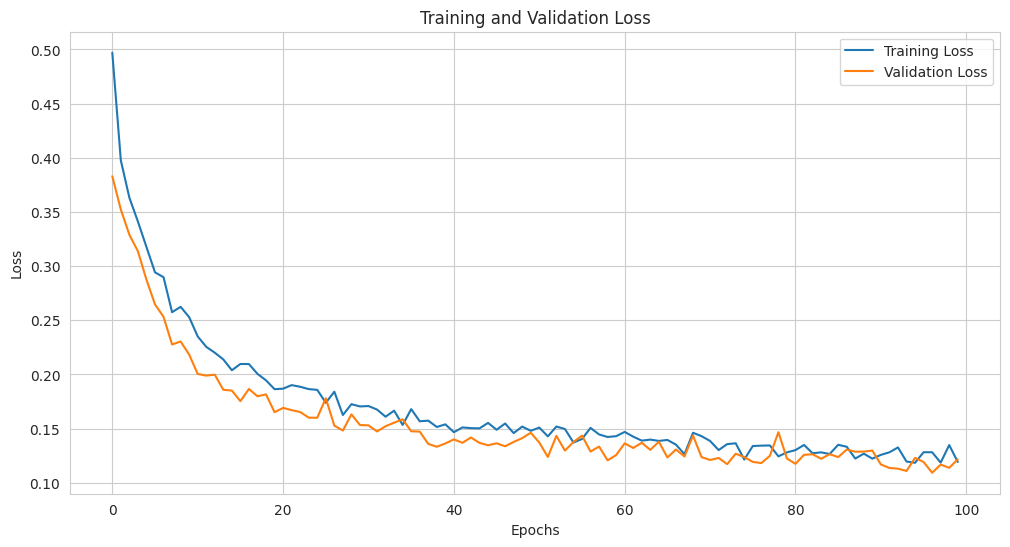

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


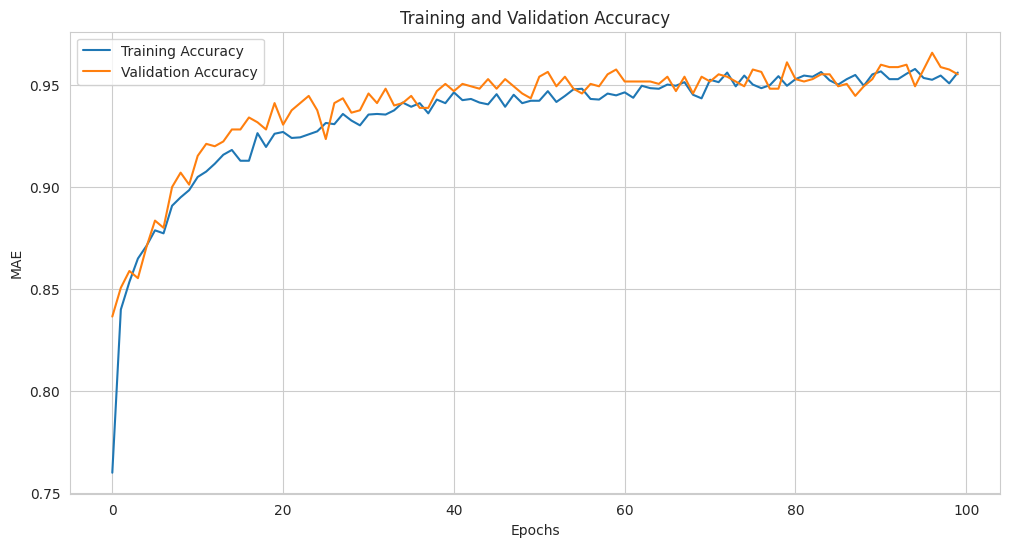

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting other metrics like MSE, if available
if acc and val_acc:
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

plt.show()

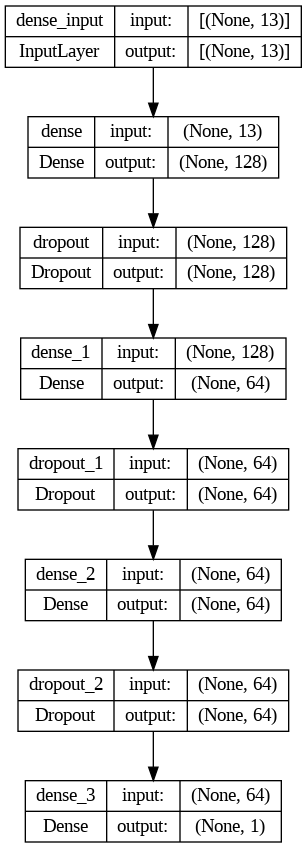

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)